

## Construction d'un modèle d'apprentissage supervisé
réalisè par: Razkou Khadija , Sakkoum Hamza
## À propos du dataset

* Ce dataset provient initialement de l'Institut national du diabète et des maladies digestives et rénales (NIDDK).
* L'objectif du dataset est de prédire de manière diagnostique si un patient est atteint de diabète en fonction de certaines mesures diagnostiques incluses dans le dataset.
* Plusieurs contraintes ont été imposées sur la sélection de ces instances à partir d'une base de données plus large.
* En particulier, tous les patients ici sont des femmes âgées d'au moins 21 ans et d'origine indienne Pima.
* À partir du dataset contenu dans le fichier (.csv), nous pouvons trouver plusieurs variables, certaines d'entre elles sont indépendantes (plusieurs variables prédictives médicales) et une seule variable dépendante cible (Résultat).

## Origine et Contexte

## Origine
* Les données proviennent de l'Institut national du diabète et des maladies digestives et rénales (NIDDK) des États-Unis.
* L'Institut national du diabète et des maladies digestives et rénales (NIDDK) fait partie des Instituts nationaux de la santé (NIH) des États-Unis.

## Contexte de l'étude
* La population Pima a été choisie pour cette étude en raison de la prévalence extrêmement élevée du diabète de type 2 parmi ses membres. Les Pimas vivent dans la région de Gila River en Arizona, et ils présentent un taux de diabète parmi les plus élevés au monde.
* L'étude a impliqué des examens médicaux, des tests de laboratoire et la collecte de données démographiques pour identifier les facteurs de risque associés au diabète de type 2. Cela inclut des tests de tolérance au glucose, des mesures de la pression artérielle, des analyses sanguines pour l'insuline et le glucose, et d'autres mesures anthropométriques.

##  Objectifs de l'étude
* **Déterminer les facteurs de risque** : Identifier les facteurs de risque de diabète de type 2 spécifiques à cette population.
* **Prévalence du diabète** : Comprendre pourquoi le diabète de type 2 est si répandu parmi les Pimas et comparer ces facteurs avec ceux observés dans d'autres populations.
* **Prévention et traitement** : Utiliser les résultats pour améliorer les stratégies de prévention et de traitement du diabète.

## Population étudiée
* Les femmes de la tribu Pima, un groupe amériqueIndien vivant en Arizona, ont été choisies pour cette étude en raison de leur prévalence élevée de diabète de type 2.

## Structure des Données
* La base de données contient 768 enregistrements, chacun correspondant à une personne, et comprend les attributs suivants :
    * Nombre de grossesses (pregnancies)
    * Concentration de glucose plasmatique à 2 heures lors d'un test de tolérance au glucose (glucose)
    * Pression artérielle diastolique (mm Hg) (blood pressure)
    * Épaisseur du pli cutané tricipital (mm) (skin thickness)
    * Insulinémie (insulin)
    * Indice de masse corporelle (BMI), défini comme poids en kg / (taille en m)^2
    * Diabète héréditaire (diabetes pedigree function), qui évalue la probabilité de diabète basée sur les antécédents familiaux
    * Âge (age)
    * Classe cible (Outcome), indiquant si la personne a été diagnostiquée avec le diabète (1) ou non (0)

## Utilisation du Dataset
* Nous utiliserons le dataset pour prédire si un patient est atteint de diabète ou non.
* Nous utiliserons différents algorithmes de classification pour prédire le résultat.
* Nous utiliserons différentes mesures d'évaluation pour évaluer les performances des modèles.
* Nous utiliserons différentes techniques pour traiter les valeurs manquantes et les valeurs aberrantes dans le dataset.
* Nous utiliserons différentes techniques pour traiter le déséquilibre dans le dataset.
* Nous utiliserons différentes techniques pour traiter l'échelle du dataset.
* Nous utiliserons différentes techniques pour traiter la sélection des caractéristiques dans le dataset.

## Métriques d'évaluation
* Nous utiliserons les métriques d'évaluation suivantes pour évaluer les performances des modèles :
    * Précision
    * Rappel
    * Score F1
    * Score AUC ROC

## Table des matières
* Étape 1 : Importation des bibliothèques pertinentes
* Étape 2 : Inspection des données
* Étape 3 : Nettoyage des données
* Étape 4 : Analyse exploratoire des données
* Étape 5 : Prétraitement des données
* Étape 6 : Construction du modèle
* Étape 7 : Évaluation du modèle
* Étape 8 : Conclusion
```

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn

In [2]:
data=pd.read_csv('./data/diabetes.csv')

In [3]:
data.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [4]:
#  Affichage des 5 lignes premiers du dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Affichage des echantillons dupliquèes
print("Le nombre des échantillons dupliqués est :", data.duplicated().sum())

Le nombre des échantillons dupliqués est : 0


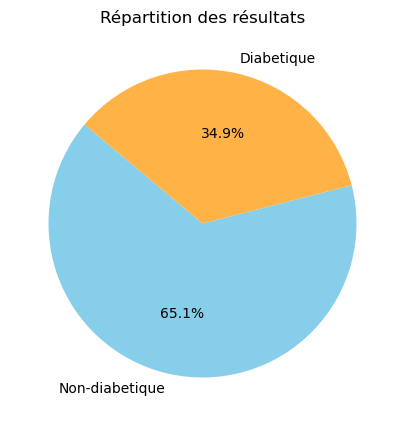

In [7]:
plt.figure(figsize=(5,5))
plt.pie( data['Outcome'].value_counts(), labels=['Non-diabetique','Diabetique'], 
         autopct='%1.1f%%', startangle=140, colors=['skyblue', '#FFB347']
        )
plt.title('Répartition des résultats', fontsize=12)
plt.show()

c:\Users\hamza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hamza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hamza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hamza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

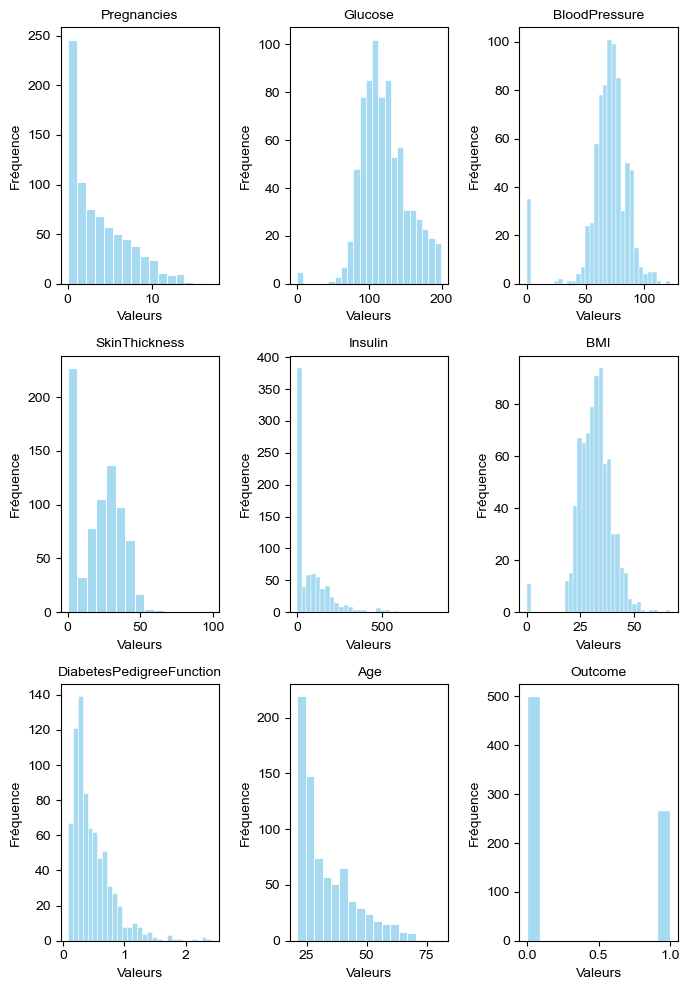

In [8]:
# Tracer des histogrammes pour chaque colonne dans une seule figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(7, 10))

# Configuration du style
sns.set_style('white') 

# Tracer des histogrammes pour chaque colonne
for i, column in enumerate(data.columns):
    sns.histplot(data[column], color='skyblue', kde=False, ax=axes[i//3, i%3])  
    axes[i//3, i%3].set_title(f'{column}', fontsize=10)
    axes[i//3, i%3].set_xlabel('Valeurs', fontsize=10)
    axes[i//3, i%3].set_ylabel('Fréquence', fontsize=10)
    axes[i//3, i%3].tick_params(labelsize=10)
    axes[i//3, i%3].grid(False)  # Désactive les lignes de grille

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()


<Axes: >

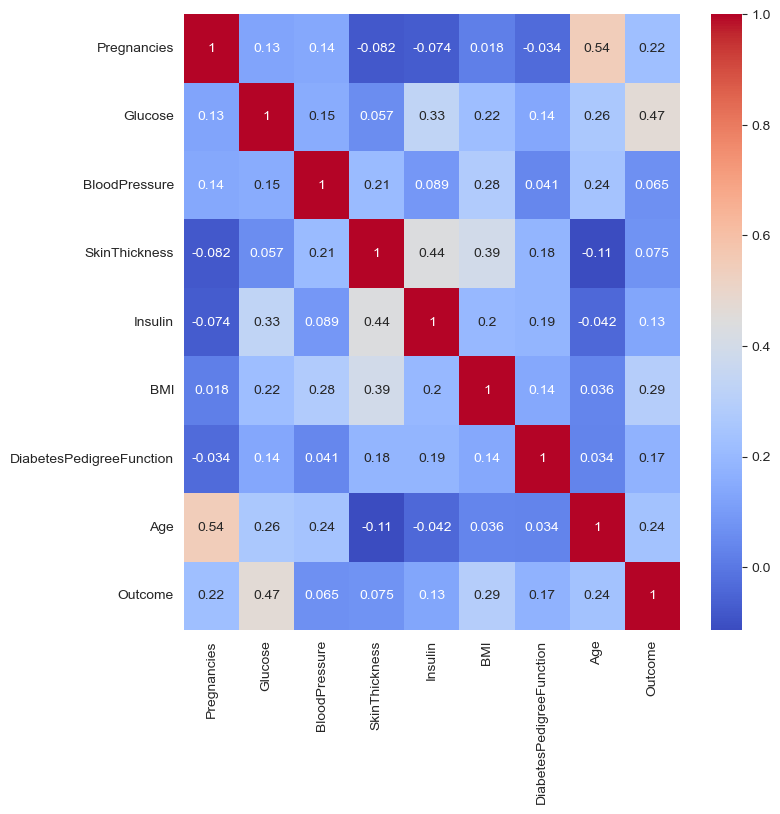

In [9]:
correlation = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Explication de la corrélation entre les caractéristiques
* La corrélation est une mesure statistique qui indique dans quelle mesure deux variables ou plus fluctuent ensemble.
* Une corrélation positive indique dans quelle mesure ces variables augmentent ou diminuent de manière parallèle ; une corrélation négative indique dans quelle mesure une variable augmente lorsque l'autre diminue.
* Dans cette dataset , nous utiliserons la matrice de corrélation pour comprendre la relation entre les caractéristiques.
* En examinant la matrice de corrélation, nous comprenons qu'il n'y a pas de corrélation forte entre la variable cible et les variables indépendantes.

In [10]:
# Séparation des données en caractéristiques(X) et étiquettes(y).
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [11]:
# Divisons les données en ensemble d'entraînement et ensemble de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)
X_train.shape , X_test.shape  #Dimensions de chaque ensemble

((614, 8), (154, 8))

* Les arguments X et y sont les données d'entrée et de sortie respectivement. 
* test_size=0.2 spécifie que 20% des données seront utilisées pour le test, et les 80% restants pour l'entraînement.
* random_state=42 est une graine aléatoire utilisée pour garantir la reproductibilité des résultats.

c:\Users\hamza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hamza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hamza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


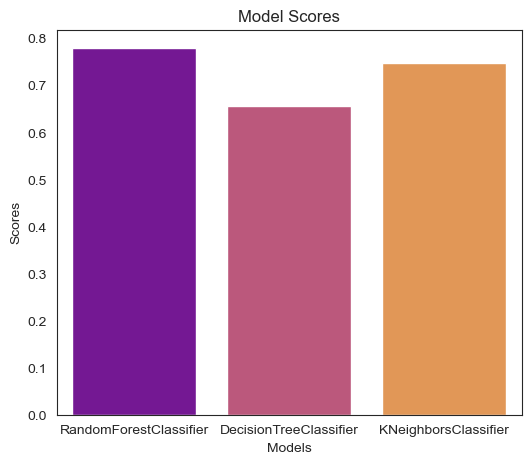

In [12]:
# Importation des models de machine learning. 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# deux listes contenant les models et leurs noms
models = [ RandomForestClassifier(random_state=42), DecisionTreeClassifier(random_state=42),KNeighborsClassifier()]
model_names = [ 'RandomForestClassifier', 'DecisionTreeClassifier',"KNeighborsClassifier"]
scores = []

for model in models:  #boucle parcourant les models
    model.fit(X_train, y_train)  #entrainement avec la methode fit
    scores.append(model.score(X_test, y_test)) #l'ajout de score de chaque model dans la liste scores
       
# Visualization des scores.
model_scores = pd.DataFrame({'Model': model_names, 'Scores': scores}) 
plt.figure(figsize=(6, 5)) #la taille de la figure
sns.barplot(x='Model', y='Scores', data=model_scores, palette='plasma')
plt.title('Model Scores') #Titre de diagramme
plt.xlabel('Models') 
plt.ylabel('Scores')
plt.show()

Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        99
           1       0.74      0.58      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

Accuracy Score: 0.7792207792207793


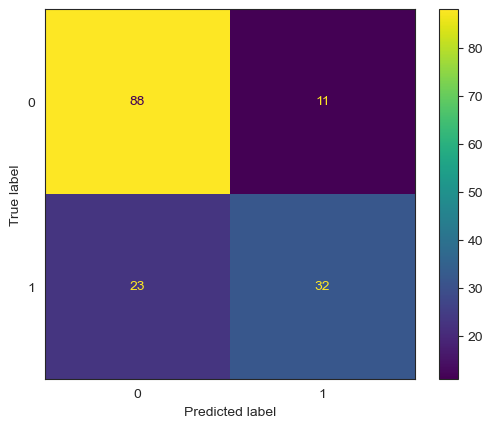

In [13]:
## Importation des outils d'évaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

#prédiction avec le meilleur model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
#accuracy_score(y_test, y_pred): Cette fonction calcule le score d'exactitude du modèle,
#qui est le pourcentage de prédictions correctes parmi toutes les prédictions effectuées.

#Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=[0, 1])
disp.plot() 
plt.show()
#confusion_matrix(y_test, y_pred): Cette fonction calcule la matrice de confusion à partir des valeurs réelles y_test et des prédictions y_pred.
#La matrice de confusion est une table qui montre les vrais positifs, les vrais négatifs, les faux positifs et les faux négatifs de la classification.

Accuracy Score: 0.8116883116883117


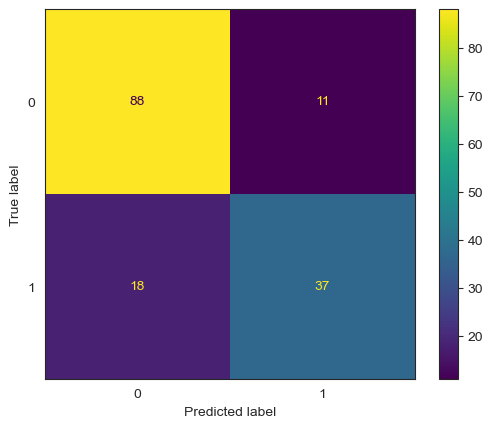

In [14]:
#Faisons des prédictions avec le meilleur modèle en specifiant les meilleurs hyperparamétres.
model = RandomForestClassifier(criterion = 'entropy', max_depth =17, max_features = 'log2', n_estimators = 200,random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=[0, 1])
disp.plot()
plt.show()

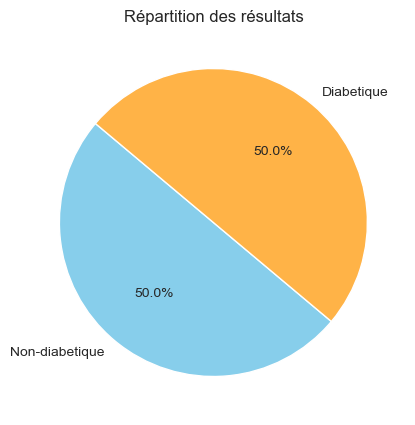

(1000, 9)

In [15]:
#Equilibrage des données avec la technique de sur-échantillonage
count_class_0, count_class_1 = data['Outcome'].value_counts()
#La variable count_class_0 représente le nombre d'instances non-diabétique 
#tandis que la variable count_class_1 représente le nombre d'instances  diabétique.

# Division par class:
df_class_0 = data[data['Outcome'] == 0]
df_class_1 = data[data['Outcome'] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True,random_state=2024)
#échantillonnage aléatoire (avec remplacement) des instances de la classe 1 jusqu'a atteindre le nombre des instances de la classe 0 

data = pd.concat([df_class_0, df_class_1_over], axis=0) #concaténation des deux ensembles de données équilibrés

plt.figure(figsize=(5,5))
plt.pie( data['Outcome'].value_counts(), labels=['Non-diabetique','Diabetique'], 
         autopct='%1.1f%%', startangle=140, colors=['skyblue', '#FFB347']
        )
plt.title('Répartition des résultats', fontsize=12)
plt.show()
data.shape

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       107
           1       0.82      0.99      0.90        93

    accuracy                           0.90       200
   macro avg       0.91      0.90      0.89       200
weighted avg       0.91      0.90      0.89       200

Accuracy Score: 89.5


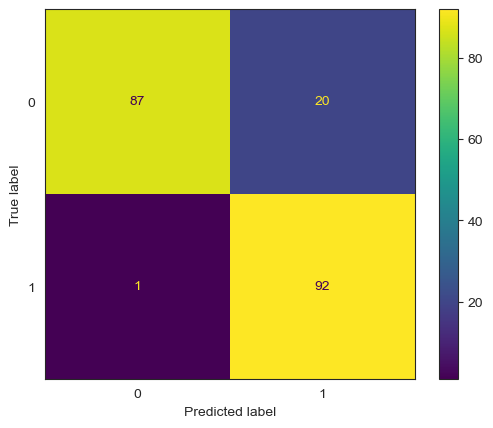

In [16]:
#Séparation
X = data.drop('Outcome', axis=1)
y = data['Outcome']

#Division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

#Entrainement
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Test et évaluation
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)*100}')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=[0, 1])
disp.plot()
plt.show()

In [17]:
test_1 = [0,137,40,35,168,43.1,2.288,33] 
test_0=[1,89,66,23,94,28.1,0.167,21]
test_1_np = np.array(test_1).reshape(1,8)
test_0_np=np.array(test_0).reshape(1,8)
# prediction sur la nouvelle arraylist
test_prediction_1 = model.predict(test_1_np)
test_prediction_0=model.predict(test_0_np)
print("la prediction d'un personne diabetique", test_prediction_1)
print("la prediction d'un personne non diabetique", test_prediction_0)


la prediction d'un personne diabetique [1]
la prediction d'un personne non diabetique [0]


c:\Users\hamza\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\hamza\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
